In [69]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from livelossplot import PlotLossesKeras
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
#from tensorflow.keras import Sequential


In [70]:
colnames = ['Class','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','dilute','Proline']
df = pd.read_csv('wine.data',names = colnames,index_col = False)

In [71]:
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,dilute,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [72]:
df = pd.get_dummies(df, columns=['Class'])


In [73]:
labels = df.loc[:,['Class_1','Class_2','Class_3']]
labels=labels.values

In [74]:
features = df.drop(['Class_1','Class_2','Class_3'],axis = 1)
features=features.values

In [75]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=42)

In [76]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(133, 13) (133, 3) (45, 13) (45, 3)


In [412]:
model = keras.Sequential(
    [
        layers.Dense(26, activation="relu",input_shape=(13,), name="layer1"),
        layers.Dense(3, activation="softmax", name="layer4"),
    ]
)

In [413]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 26)                364       
_________________________________________________________________
layer4 (Dense)               (None, 3)                 81        
Total params: 445
Trainable params: 445
Non-trainable params: 0
_________________________________________________________________


In [415]:
opt = keras.optimizers.RMSprop(learning_rate=0.002)

In [416]:
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history=model.fit(X_train, y_train,
          batch_size=5,
          epochs=1000,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 133 samples, validate on 45 samples
Epoch 1/1000
133/133 [==============================] - 0s 428us/sample - loss: 0.2197 - accuracy: 0.9774 - val_loss: 0.2260 - val_accuracy: 0.9778
Epoch 2/1000
133/133 [==============================] - 0s 473us/sample - loss: 0.2966 - accuracy: 0.9549 - val_loss: 0.6300 - val_accuracy: 0.8444
Epoch 3/1000
133/133 [==============================] - 0s 436us/sample - loss: 0.2054 - accuracy: 0.9474 - val_loss: 0.2577 - val_accuracy: 0.9111
Epoch 4/1000
133/133 [==============================] - 0s 458us/sample - loss: 0.1757 - accuracy: 0.9624 - val_loss: 0.2589 - val_accuracy: 0.9111
Epoch 5/1000
133/133 [==============================] - 0s 436us/sample - loss: 0.0430 - accuracy: 0.9774 - val_loss: 0.1491 - val_accuracy: 0.9556
Epoch 6/1000
133/133 [==============================] - 0s 428us/sample - loss: 0.0441 - accuracy: 0.9850 - val_loss: 1.4403 - val_accuracy: 0.7778
Epoch 7/1000
133/133 [==============================] - 0s 398us/sa

Epoch 56/1000
133/133 [==============================] - 0s 391us/sample - loss: 0.1108 - accuracy: 0.9549 - val_loss: 0.2023 - val_accuracy: 0.9556
Epoch 57/1000
133/133 [==============================] - 0s 383us/sample - loss: 0.0411 - accuracy: 0.9850 - val_loss: 0.1337 - val_accuracy: 0.9556
Epoch 58/1000
133/133 [==============================] - 0s 421us/sample - loss: 0.1925 - accuracy: 0.9323 - val_loss: 0.1812 - val_accuracy: 0.9556
Epoch 59/1000
133/133 [==============================] - 0s 368us/sample - loss: 0.0858 - accuracy: 0.9774 - val_loss: 0.1316 - val_accuracy: 0.9333
Epoch 60/1000
133/133 [==============================] - 0s 368us/sample - loss: 0.1040 - accuracy: 0.9774 - val_loss: 0.2404 - val_accuracy: 0.9111
Epoch 61/1000
133/133 [==============================] - 0s 368us/sample - loss: 0.1363 - accuracy: 0.9549 - val_loss: 0.1872 - val_accuracy: 0.9778
Epoch 62/1000
133/133 [==============================] - 0s 383us/sample - loss: 0.1391 - accuracy: 0.9624

Epoch 111/1000
133/133 [==============================] - 0s 421us/sample - loss: 0.1176 - accuracy: 0.9549 - val_loss: 0.1391 - val_accuracy: 0.9333
Epoch 112/1000
133/133 [==============================] - 0s 376us/sample - loss: 0.1017 - accuracy: 0.9624 - val_loss: 0.2222 - val_accuracy: 0.9111
Epoch 113/1000
133/133 [==============================] - 0s 391us/sample - loss: 0.2786 - accuracy: 0.9699 - val_loss: 0.3221 - val_accuracy: 0.9111
Epoch 114/1000
133/133 [==============================] - 0s 368us/sample - loss: 0.0153 - accuracy: 0.9925 - val_loss: 0.1605 - val_accuracy: 0.9333
Epoch 115/1000
133/133 [==============================] - 0s 376us/sample - loss: 0.1628 - accuracy: 0.9699 - val_loss: 0.1457 - val_accuracy: 0.9778
Epoch 116/1000
133/133 [==============================] - 0s 368us/sample - loss: 0.0509 - accuracy: 0.9774 - val_loss: 0.8138 - val_accuracy: 0.8667
Epoch 117/1000
133/133 [==============================] - 0s 391us/sample - loss: 0.1322 - accuracy:

133/133 [==============================] - 0s 368us/sample - loss: 0.2211 - accuracy: 0.9549 - val_loss: 0.1519 - val_accuracy: 0.9333
Epoch 166/1000
133/133 [==============================] - 0s 391us/sample - loss: 0.0868 - accuracy: 0.9850 - val_loss: 0.2062 - val_accuracy: 0.9556
Epoch 167/1000
133/133 [==============================] - 0s 383us/sample - loss: 0.1582 - accuracy: 0.9699 - val_loss: 0.2493 - val_accuracy: 0.9556
Epoch 168/1000
133/133 [==============================] - 0s 383us/sample - loss: 0.0418 - accuracy: 0.9774 - val_loss: 0.3832 - val_accuracy: 0.8889
Epoch 169/1000
133/133 [==============================] - 0s 376us/sample - loss: 0.1469 - accuracy: 0.9699 - val_loss: 0.1190 - val_accuracy: 0.9556
Epoch 170/1000
133/133 [==============================] - 0s 406us/sample - loss: 0.1832 - accuracy: 0.9549 - val_loss: 0.1738 - val_accuracy: 0.9333
Epoch 171/1000
133/133 [==============================] - 0s 368us/sample - loss: 0.0690 - accuracy: 0.9850 - val_l

Epoch 220/1000
133/133 [==============================] - 0s 406us/sample - loss: 0.1072 - accuracy: 0.9549 - val_loss: 0.1377 - val_accuracy: 0.9333
Epoch 221/1000
133/133 [==============================] - 0s 398us/sample - loss: 0.2745 - accuracy: 0.9549 - val_loss: 0.3365 - val_accuracy: 0.9111
Epoch 222/1000
133/133 [==============================] - 0s 413us/sample - loss: 0.0741 - accuracy: 0.9850 - val_loss: 0.1972 - val_accuracy: 0.9333
Epoch 223/1000
133/133 [==============================] - 0s 383us/sample - loss: 0.0828 - accuracy: 0.9850 - val_loss: 0.0375 - val_accuracy: 0.9778
Epoch 224/1000
133/133 [==============================] - 0s 368us/sample - loss: 0.0949 - accuracy: 0.9774 - val_loss: 0.1658 - val_accuracy: 0.9333
Epoch 225/1000
133/133 [==============================] - 0s 361us/sample - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.3196 - val_accuracy: 0.9778
Epoch 226/1000
133/133 [==============================] - 0s 383us/sample - loss: 0.0762 - accuracy:

133/133 [==============================] - 0s 406us/sample - loss: 0.0873 - accuracy: 0.9774 - val_loss: 0.1676 - val_accuracy: 0.9556
Epoch 275/1000
133/133 [==============================] - 0s 391us/sample - loss: 0.0584 - accuracy: 0.9925 - val_loss: 1.2135 - val_accuracy: 0.8222
Epoch 276/1000
133/133 [==============================] - 0s 368us/sample - loss: 0.1823 - accuracy: 0.9624 - val_loss: 0.2080 - val_accuracy: 0.9333
Epoch 277/1000
133/133 [==============================] - 0s 398us/sample - loss: 0.0778 - accuracy: 0.9774 - val_loss: 0.2976 - val_accuracy: 0.9333
Epoch 278/1000
133/133 [==============================] - 0s 368us/sample - loss: 0.0959 - accuracy: 0.9774 - val_loss: 0.2674 - val_accuracy: 0.8889
Epoch 279/1000
133/133 [==============================] - 0s 406us/sample - loss: 0.0462 - accuracy: 0.9699 - val_loss: 0.8100 - val_accuracy: 0.9111
Epoch 280/1000
133/133 [==============================] - 0s 383us/sample - loss: 0.1358 - accuracy: 0.9699 - val_l

Epoch 329/1000
133/133 [==============================] - 0s 398us/sample - loss: 0.1060 - accuracy: 0.9774 - val_loss: 0.2845 - val_accuracy: 0.9778
Epoch 330/1000
133/133 [==============================] - 0s 383us/sample - loss: 0.2211 - accuracy: 0.9323 - val_loss: 0.2188 - val_accuracy: 0.9556
Epoch 331/1000
133/133 [==============================] - 0s 391us/sample - loss: 0.0726 - accuracy: 0.9774 - val_loss: 0.4815 - val_accuracy: 0.9111
Epoch 332/1000
133/133 [==============================] - 0s 391us/sample - loss: 0.1309 - accuracy: 0.9850 - val_loss: 0.9991 - val_accuracy: 0.9333
Epoch 333/1000
133/133 [==============================] - 0s 376us/sample - loss: 0.0739 - accuracy: 0.9774 - val_loss: 0.1973 - val_accuracy: 0.9556
Epoch 334/1000
133/133 [==============================] - 0s 376us/sample - loss: 0.0802 - accuracy: 0.9774 - val_loss: 0.3804 - val_accuracy: 0.9111
Epoch 335/1000
133/133 [==============================] - 0s 368us/sample - loss: 0.2592 - accuracy:

133/133 [==============================] - 0s 368us/sample - loss: 0.1569 - accuracy: 0.9549 - val_loss: 0.4060 - val_accuracy: 0.8667
Epoch 384/1000
133/133 [==============================] - 0s 398us/sample - loss: 0.1257 - accuracy: 0.9774 - val_loss: 0.3320 - val_accuracy: 0.9333
Epoch 385/1000
133/133 [==============================] - 0s 383us/sample - loss: 0.1189 - accuracy: 0.9699 - val_loss: 0.2235 - val_accuracy: 0.9333
Epoch 386/1000
133/133 [==============================] - 0s 376us/sample - loss: 0.1690 - accuracy: 0.9699 - val_loss: 0.2871 - val_accuracy: 0.9778
Epoch 387/1000
133/133 [==============================] - 0s 368us/sample - loss: 0.1034 - accuracy: 0.9624 - val_loss: 0.1917 - val_accuracy: 0.9111
Epoch 388/1000
133/133 [==============================] - 0s 368us/sample - loss: 0.0825 - accuracy: 0.9774 - val_loss: 0.1682 - val_accuracy: 0.9111
Epoch 389/1000
133/133 [==============================] - 0s 368us/sample - loss: 0.2315 - accuracy: 0.9474 - val_l

Epoch 438/1000
133/133 [==============================] - 0s 413us/sample - loss: 0.1026 - accuracy: 0.9850 - val_loss: 0.2339 - val_accuracy: 0.9556
Epoch 439/1000
133/133 [==============================] - 0s 398us/sample - loss: 0.0506 - accuracy: 0.9774 - val_loss: 0.2983 - val_accuracy: 0.9333
Epoch 440/1000
133/133 [==============================] - 0s 376us/sample - loss: 0.0972 - accuracy: 0.9774 - val_loss: 0.4591 - val_accuracy: 0.9111
Epoch 441/1000
133/133 [==============================] - 0s 376us/sample - loss: 0.1157 - accuracy: 0.9624 - val_loss: 0.0692 - val_accuracy: 0.9778
Epoch 442/1000
133/133 [==============================] - 0s 406us/sample - loss: 0.0797 - accuracy: 0.9850 - val_loss: 0.0941 - val_accuracy: 0.9333
Epoch 443/1000
133/133 [==============================] - 0s 383us/sample - loss: 0.0394 - accuracy: 0.9850 - val_loss: 0.3564 - val_accuracy: 0.9556
Epoch 444/1000
133/133 [==============================] - 0s 368us/sample - loss: 0.0870 - accuracy:

133/133 [==============================] - 0s 436us/sample - loss: 0.1601 - accuracy: 0.9699 - val_loss: 0.1925 - val_accuracy: 0.9778
Epoch 493/1000
133/133 [==============================] - 0s 436us/sample - loss: 0.1080 - accuracy: 0.9699 - val_loss: 0.3300 - val_accuracy: 0.9111
Epoch 494/1000
133/133 [==============================] - 0s 406us/sample - loss: 0.1333 - accuracy: 0.9774 - val_loss: 0.2414 - val_accuracy: 0.9111
Epoch 495/1000
133/133 [==============================] - 0s 443us/sample - loss: 0.2010 - accuracy: 0.9474 - val_loss: 0.3557 - val_accuracy: 0.9333
Epoch 496/1000
133/133 [==============================] - 0s 376us/sample - loss: 0.2481 - accuracy: 0.9774 - val_loss: 0.3619 - val_accuracy: 0.9111
Epoch 497/1000
133/133 [==============================] - 0s 443us/sample - loss: 0.1165 - accuracy: 0.9549 - val_loss: 0.2449 - val_accuracy: 0.8889
Epoch 498/1000
133/133 [==============================] - 0s 368us/sample - loss: 0.0187 - accuracy: 0.9925 - val_l

Epoch 547/1000
133/133 [==============================] - 0s 383us/sample - loss: 0.0261 - accuracy: 0.9774 - val_loss: 0.0958 - val_accuracy: 0.9556
Epoch 548/1000
133/133 [==============================] - 0s 376us/sample - loss: 0.1847 - accuracy: 0.9699 - val_loss: 0.1531 - val_accuracy: 0.9556
Epoch 549/1000
133/133 [==============================] - 0s 383us/sample - loss: 0.0737 - accuracy: 0.9850 - val_loss: 0.4123 - val_accuracy: 0.9333
Epoch 550/1000
133/133 [==============================] - 0s 398us/sample - loss: 0.0544 - accuracy: 0.9850 - val_loss: 0.4804 - val_accuracy: 0.9111
Epoch 551/1000
133/133 [==============================] - 0s 376us/sample - loss: 0.3841 - accuracy: 0.9474 - val_loss: 0.1662 - val_accuracy: 0.9556
Epoch 552/1000
133/133 [==============================] - 0s 376us/sample - loss: 0.0091 - accuracy: 1.0000 - val_loss: 0.2182 - val_accuracy: 0.9778
Epoch 553/1000
133/133 [==============================] - 0s 368us/sample - loss: 0.1762 - accuracy:

133/133 [==============================] - 0s 376us/sample - loss: 0.1054 - accuracy: 0.9624 - val_loss: 1.9206 - val_accuracy: 0.8222
Epoch 602/1000
133/133 [==============================] - 0s 436us/sample - loss: 0.0820 - accuracy: 0.9699 - val_loss: 0.1748 - val_accuracy: 0.9333
Epoch 603/1000
133/133 [==============================] - 0s 391us/sample - loss: 0.1441 - accuracy: 0.9549 - val_loss: 1.9206 - val_accuracy: 0.8889
Epoch 604/1000
133/133 [==============================] - 0s 376us/sample - loss: 0.2051 - accuracy: 0.9474 - val_loss: 0.2396 - val_accuracy: 0.8889
Epoch 605/1000
133/133 [==============================] - 0s 368us/sample - loss: 0.0640 - accuracy: 0.9699 - val_loss: 0.1171 - val_accuracy: 0.9778
Epoch 606/1000
133/133 [==============================] - 0s 368us/sample - loss: 0.1519 - accuracy: 0.9624 - val_loss: 0.9344 - val_accuracy: 0.9111
Epoch 607/1000
133/133 [==============================] - 0s 376us/sample - loss: 0.1064 - accuracy: 0.9774 - val_l

Epoch 656/1000
133/133 [==============================] - 0s 451us/sample - loss: 0.0412 - accuracy: 0.9774 - val_loss: 0.1040 - val_accuracy: 0.9556
Epoch 657/1000
133/133 [==============================] - 0s 481us/sample - loss: 0.0530 - accuracy: 0.9624 - val_loss: 0.5405 - val_accuracy: 0.9111
Epoch 658/1000
133/133 [==============================] - 0s 488us/sample - loss: 0.0873 - accuracy: 0.9774 - val_loss: 0.6205 - val_accuracy: 0.8889
Epoch 659/1000
133/133 [==============================] - 0s 481us/sample - loss: 0.1032 - accuracy: 0.9850 - val_loss: 0.2942 - val_accuracy: 0.9333
Epoch 660/1000
133/133 [==============================] - 0s 473us/sample - loss: 0.1352 - accuracy: 0.9549 - val_loss: 0.3595 - val_accuracy: 0.9778
Epoch 661/1000
133/133 [==============================] - 0s 481us/sample - loss: 0.2568 - accuracy: 0.9474 - val_loss: 0.1612 - val_accuracy: 0.9556
Epoch 662/1000
133/133 [==============================] - 0s 488us/sample - loss: 0.0518 - accuracy:

133/133 [==============================] - 0s 496us/sample - loss: 0.1024 - accuracy: 0.9699 - val_loss: 0.1850 - val_accuracy: 0.9556
Epoch 711/1000
133/133 [==============================] - 0s 481us/sample - loss: 0.1274 - accuracy: 0.9774 - val_loss: 0.9115 - val_accuracy: 0.8667
Epoch 712/1000
133/133 [==============================] - 0s 466us/sample - loss: 0.0381 - accuracy: 0.9850 - val_loss: 0.5343 - val_accuracy: 0.8667
Epoch 713/1000
133/133 [==============================] - 0s 473us/sample - loss: 0.0499 - accuracy: 0.9699 - val_loss: 0.2827 - val_accuracy: 0.9111
Epoch 714/1000
133/133 [==============================] - 0s 503us/sample - loss: 0.0322 - accuracy: 0.9925 - val_loss: 0.3764 - val_accuracy: 0.9556
Epoch 715/1000
133/133 [==============================] - 0s 466us/sample - loss: 0.1172 - accuracy: 0.9774 - val_loss: 0.6914 - val_accuracy: 0.8889
Epoch 716/1000
133/133 [==============================] - 0s 473us/sample - loss: 0.1501 - accuracy: 0.9624 - val_l

In [418]:
prediction=model.predict(X_test)

matrix = confusion_matrix(y_test.argmax(axis=1), prediction.argmax(axis=1))

In [419]:
matrix

array([[15,  0,  0],
       [ 4, 13,  1],
       [ 0,  0, 12]], dtype=int64)

In [420]:
score = model.evaluate(X_train,y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.26530310998957857
Train accuracy: 0.9548872


In [421]:
score = model.evaluate(X_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5528788963953654
Test accuracy: 0.8888889


In [422]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


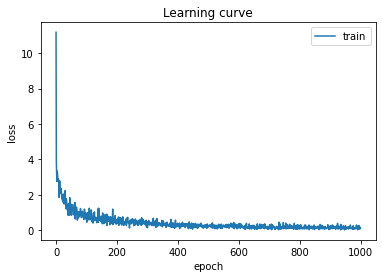

In [423]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Learning curve')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()